In [23]:
# Hands-on practice lab: Model Development

In [24]:
from tkinter.constants import MULTIPLE

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.extras import average
from psutil import cpu_freq
from pygame.midi import Input
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from torch.distributed.pipelining import pipeline
from torch.utils.tensorboard.summary import histogram




In [25]:
# import dataset

In [26]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [27]:
df = pd.read_csv(path,header = 0)

In [28]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [29]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [30]:
# Single Linear Regression

In [33]:
X = df[['CPU_frequency']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
# Output the results
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

cpu_frequency_example = np.array([[3.5]])
predicted_price = model.predict(cpu_frequency_example)
print(f"Predicted Price for CPU_frequency = 3.5: {predicted_price[0]}")

Model Coefficients:
Intercept: 206.82010195771954
Slope: 1580.2477854928034
Mean Squared Error (MSE): 239035.9942943603
R-squared (R²): -0.03719417833496452
Predicted Price for CPU_frequency = 3.5: 5737.687351182531


In [40]:
lm = LinearRegression()
X = df[["CPU_frequency"]]
Y = df[["Price"]]
lm.fit(X,Y)
yhat = lm.predict(X)
print(f" Prediction Y-hat = {yhat}")

 Prediction Y-hat = [[1073.07834392]
 [1277.93263722]
 [1636.42765051]
 [1073.07834392]
 [1175.50549057]
 [1073.07834392]
 [1073.07834392]
 [1073.07834392]
 [1534.00050386]
 [1175.50549057]
 [1175.50549057]
 [1277.93263722]
 [1277.93263722]
 [1073.07834392]
 [1073.07834392]
 [1534.00050386]
 [1175.50549057]
 [1175.50549057]
 [1073.07834392]
 [1073.07834392]
 [1175.50549057]
 [1534.00050386]
 [1175.50549057]
 [1534.00050386]
 [1636.42765051]
 [1277.93263722]
 [1482.78693053]
 [1636.42765051]
 [1636.42765051]
 [1534.00050386]
 [1636.42765051]
 [1636.42765051]
 [1073.07834392]
 [1175.50549057]
 [1073.07834392]
 [1175.50549057]
 [1636.42765051]
 [1175.50549057]
 [1534.00050386]
 [1073.07834392]
 [1175.50549057]
 [1636.42765051]
 [1073.07834392]
 [1073.07834392]
 [1073.07834392]
 [1687.64122384]
 [1073.07834392]
 [1534.00050386]
 [1073.07834392]
 [1073.07834392]
 [ 868.22405061]
 [1175.50549057]
 [1175.50549057]
 [1175.50549057]
 [1175.50549057]
 [1073.07834392]
 [1073.07834392]
 [1534.0005

Text(0, 0.5, 'Price')

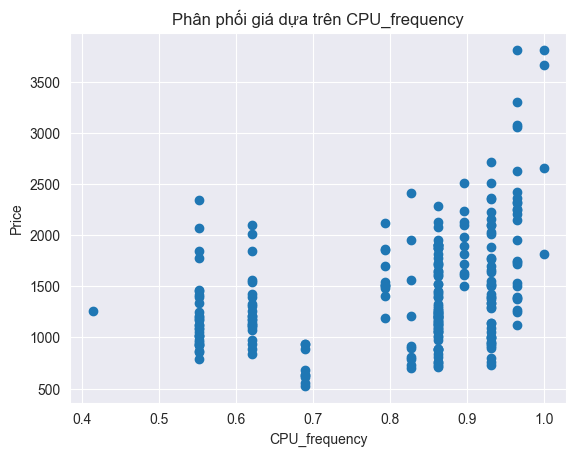

In [41]:
plt.scatter(X,Y)
plt.title("Phân phối giá dựa trên CPU_frequency")
plt.xlabel("CPU_frequency")
plt.ylabel("Price")


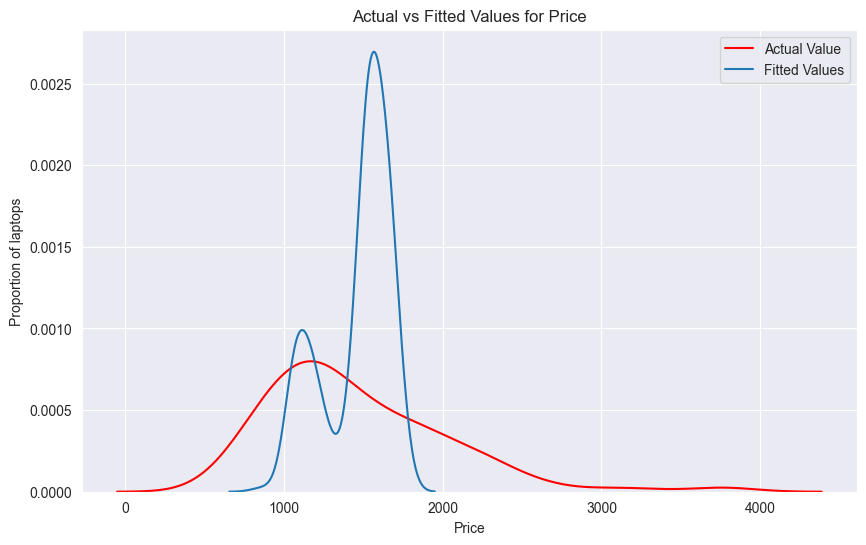

In [43]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['Price'], color='r', label="Actual Value", fill=False)
sns.kdeplot(yhat, color='b', label="Fitted Values", fill=False)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Fitted Values'])
plt.show()

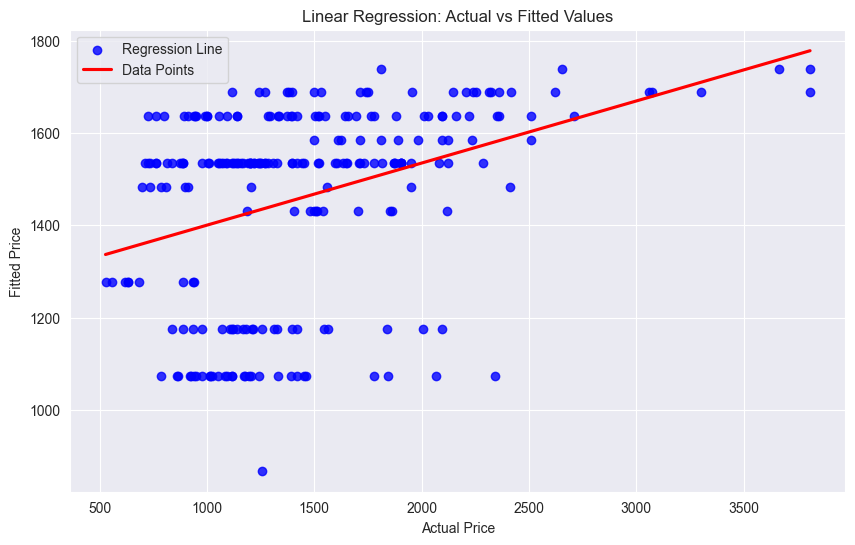

In [46]:
plt.figure(figsize=(10, 6))

sns.regplot(x=df['Price'], y=yhat, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Linear Regression: Actual vs Fitted Values')
plt.xlabel('Actual Price')
plt.ylabel('Fitted Price')
plt.legend(['Regression Line', 'Data Points'])
plt.show()

In [47]:
# Multiple Linear Regression

In [61]:
mse_slt = mean_squared_error(df['Price'], yhat)

# Compute the R-squared score
r2_score_slr = lm.score(X, Y)

# Print the results
print(f"Mean Squared Error of CPU_frequency (MSE): {mse_slt}")
print(f"R-squared Score (R²): {r2_score_slr}")

Mean Squared Error of CPU_frequency (MSE): 284583.4405868629
R-squared Score (R²): 0.1344436321024326


In [62]:
X_2 = df[["CPU_frequency","Storage_GB_SSD","CPU_core","OS","GPU","Category"]]
Y_2 = df[['Price']]
model.fit(X_2,Y_2)
y_hat_2 = model.predict(X_2)

In [52]:
print(y_hat_2)

[[1255.23755875]
 [ 843.60893049]
 [1629.18188453]
 [1041.76477081]
 [1590.14861558]
 [ 947.01830654]
 [1207.97615864]
 [1077.49723259]
 [1294.2708277 ]
 [1542.88721547]
 [1281.92936336]
 [ 760.6150686 ]
 [ 482.27216352]
 [1255.23755875]
 [1077.49723259]
 [1424.74975376]
 [1459.66968952]
 [1281.92936336]
 [1255.23755875]
 [1077.49723259]
 [1720.62754163]
 [1424.74975376]
 [1590.14861558]
 [1199.74802749]
 [1937.40113674]
 [ 351.79323747]
 [1258.90123645]
 [1629.18188453]
 [2067.8800628 ]
 [1555.22867981]
 [2067.8800628 ]
 [1759.66081058]
 [1255.23755875]
 [1542.88721547]
 [1077.49723259]
 [1590.14861558]
 [1374.65207684]
 [1412.40828941]
 [1424.74975376]
 [ 947.01830654]
 [1590.14861558]
 [1679.65730685]
 [ 947.01830654]
 [1207.97615864]
 [ 947.01830654]
 [1573.24269777]
 [1207.97615864]
 [1602.49007992]
 [1207.97615864]
 [1255.23755875]
 [1100.9031049 ]
 [1542.88721547]
 [1590.14861558]
 [1459.66968952]
 [1542.88721547]
 [1255.23755875]
 [ 455.20261351]
 [1860.23390982]
 [1890.1397366

<Axes: xlabel='Price'>

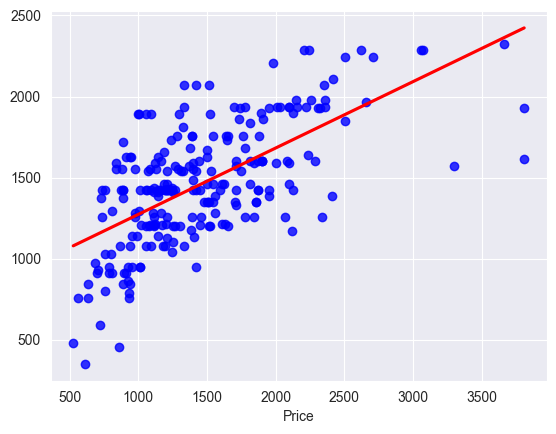

In [60]:
# vẽ biểu đồ
sns.regplot(x =df['Price'], y = y_hat_2,ci = None,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [66]:
mse_slt_muiti = mean_squared_error(df['Price'],y_hat_2)
r2_mutil = model.score(X_2, Y_2)

print(f"MSE_mutil {mse_slt_muiti}")
print(f"score = {r2_mutil}")

MSE_mutil 194285.1331986533
score = 0.40908461194672774


In [68]:
X = df[["CPU_frequency","Storage_GB_SSD","CPU_core","OS","GPU","Category"]]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
# Output the results
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Model Coefficients:
Intercept: -929.4394990312223
Slope: 1180.7323385982718
Mean Squared Error (MSE): 179437.32673306426
R-squared (R²): 0.22140867858446145


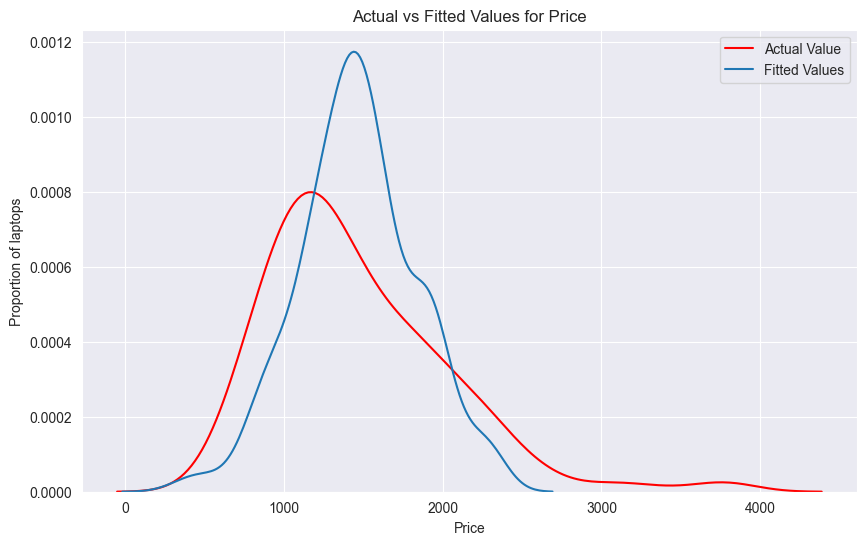

In [70]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['Price'], color='r', label="Actual Value", fill=False)
sns.kdeplot(y_hat_2, color='b', label="Fitted Values", fill=False)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Fitted Values'])

In [74]:
# Polynominal Regression

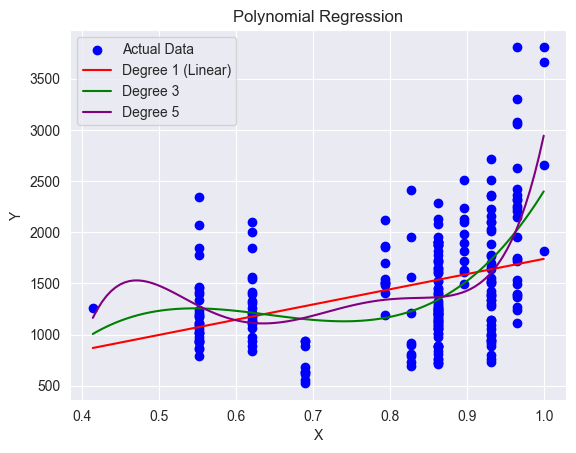

In [82]:
# Dữ liệu mẫu (thay bằng dữ liệu thực tế của bạn)
X = df['CPU_frequency'].to_numpy()
Y = df['Price'].to_numpy()

# Làm phẳng X nếu cần
X = X.flatten()  # Không cần .to_numpy()

# Tạo hồi quy đa thức bậc 1, 3, và 5
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

# Vẽ biểu đồ
plt.scatter(X, Y, color='blue', label='Actual Data')

# Vẽ các đường hồi quy
x_range = np.linspace(min(X), max(X), 100)
plt.plot(x_range, p1(x_range), label='Degree 1 (Linear)', color='red')
plt.plot(x_range, p3(x_range), label='Degree 3', color='green')
plt.plot(x_range, p5(x_range), label='Degree 5', color='purple')

plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [83]:
def PlotPolly (model, independent_variable, dependent_variable, Name):
    x_new  = np.linspace(independent_variable.min(), independent_variable.max(),100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable,'.', x_new, y_new,'-')
    plt.title(f"Polynominal Fit for Price ~ {Name}")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

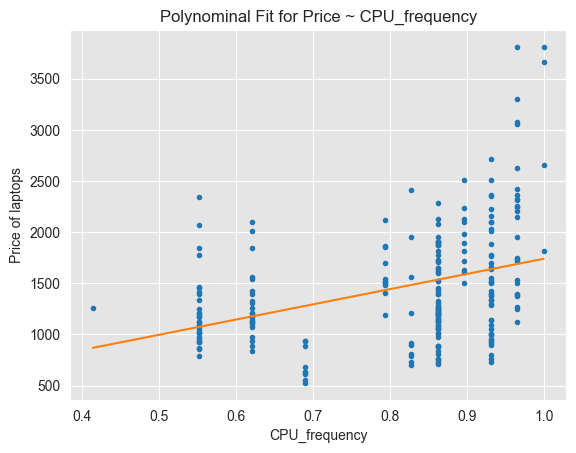

In [84]:
X = X.flatten()  # Không cần .to_numpy()

# Tạo hồi quy đa thức bậc 1, 3, và 5
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

PlotPolly(p1,X,Y,'CPU_frequency')

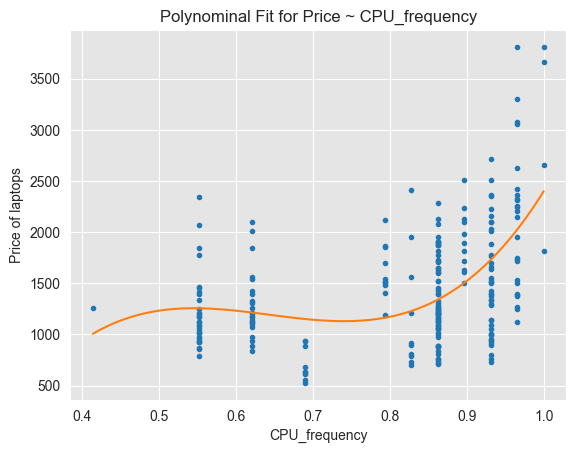

In [85]:
PlotPolly(p3, X, Y, 'CPU_frequency')

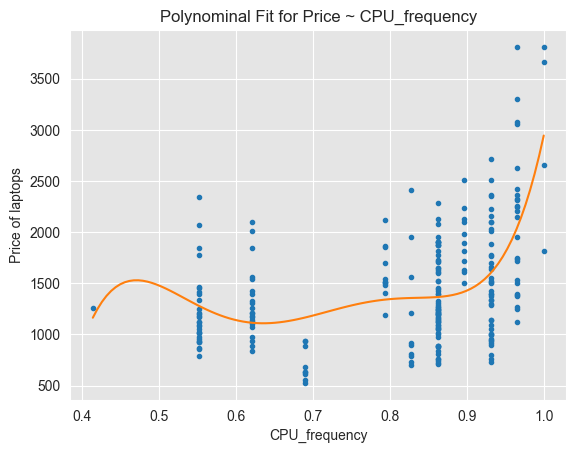

In [86]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [87]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.2669264079653113
The MSE value for 3rd degree polynomial is:  241024.86303848765
The R-square value for 5th degree polynomial is:  0.3030822706443915
The MSE value for 5th degree polynomial is:  229137.29548053455


In [88]:
# Pipline

In [96]:
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category','Weight_pounds','Screen-Full_HD','Screen-IPS_panel']]
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model', LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)



In [97]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  82553.36337972688
R^2 for multi-variable polynomial pipeline is:  0.7489151539621136


In [92]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000
